In [1]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
exp_dir = Path('/home6/msaragoc/work_dir/Kepler-TESS_exoplanet/experiments/kepler_q1q17dr25_simdata/experiments/exominer_trained_realdata_predict_simdata_11-6-2023_0931/models/model0')

In [3]:
ranking_tbl = pd.read_csv(exp_dir / 'ranked_predictions_alldatasets.csv')

In [4]:
tce_tbl = pd.read_csv('/home6/msaragoc/work_dir/Kepler-TESS_exoplanet/data/Ephemeris_tables/Kepler/Q1-Q17_DR25/q1_q17_dr25_tce_3-6-2023_1734.csv')

In [5]:
# ranking_tbl.head()
ranking_tbl = ranking_tbl.loc[ranking_tbl['label'] == 'INV']

In [57]:
ranking_tbl.columns

Index(['uid', 'target_id', 'tce_plnt_num', 'label', 'tce_period',
       'tce_duration', 'tce_time0bk', 'ruwe', 'tce_prad', 'tce_max_mult_ev',
       'label_id', 'score'],
      dtype='object')

/var/tmp/pbs.146033.pbspl4.nas.nasa.gov/ipykernel_3095/64210484.py:5: RuntimeWarning: invalid value encountered in scalar divide
  pc_fraction = [((ranking_tbl['tce_max_mult_ev'] >= s_mes) & (ranking_tbl['tce_max_mult_ev'] < e_mes) & (ranking_tbl['score'] >= clf_thr)).sum() / ((ranking_tbl['tce_max_mult_ev'] >= s_mes) & (ranking_tbl['tce_max_mult_ev'] < e_mes)).sum() for s_mes, e_mes in zip(mes_bins[:-1], mes_bins[1:])]
/var/tmp/pbs.146033.pbspl4.nas.nasa.gov/ipykernel_3095/64210484.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(bottom=0)


(7.1, 10029.016566821567)

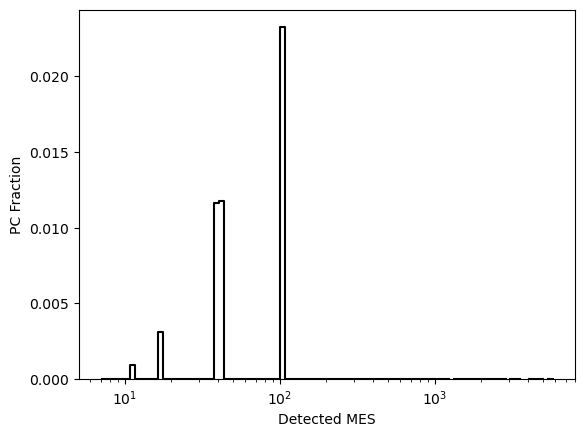

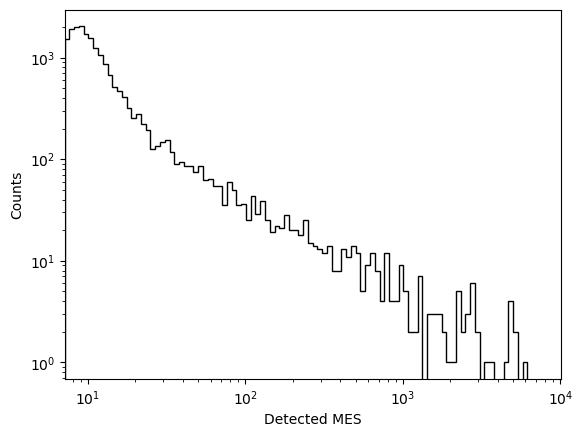

In [63]:
# plot PC fraction as function of detected MES

mes_bins = 7.1 * np.logspace(0, 3, 100, endpoint=True)
clf_thr = 0.5
pc_fraction = [((ranking_tbl['tce_max_mult_ev'] >= s_mes) & (ranking_tbl['tce_max_mult_ev'] < e_mes) & (ranking_tbl['score'] >= clf_thr)).sum() / ((ranking_tbl['tce_max_mult_ev'] >= s_mes) & (ranking_tbl['tce_max_mult_ev'] < e_mes)).sum() for s_mes, e_mes in zip(mes_bins[:-1], mes_bins[1:])]

f, ax = plt.subplots()
# ax.hist(x=pc_fraction)  # , bins=mes_bins) # , histtype='step')
# ax.bar(x=mes_bins[:-1], height=pc_fraction, log=True, histtype='step')
ax.step(x=mes_bins[:-1], y=pc_fraction, color='k')
ax.set_ylabel('PC Fraction')
ax.set_xlabel('Detected MES')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(bottom=0)

f, ax = plt.subplots()
ax.hist(ranking_tbl['tce_max_mult_ev'], mes_bins, histtype='step', color='k')
ax.set_ylabel('Counts')
ax.set_xlabel('Detected MES')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylim(bottom=0)
ax.set_xlim(left=7.1)

(0.0, 425.25)

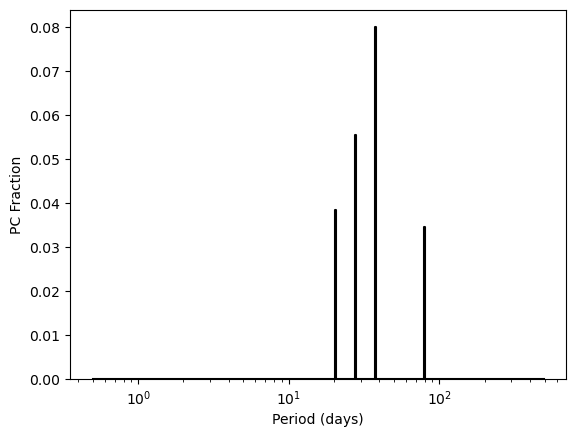

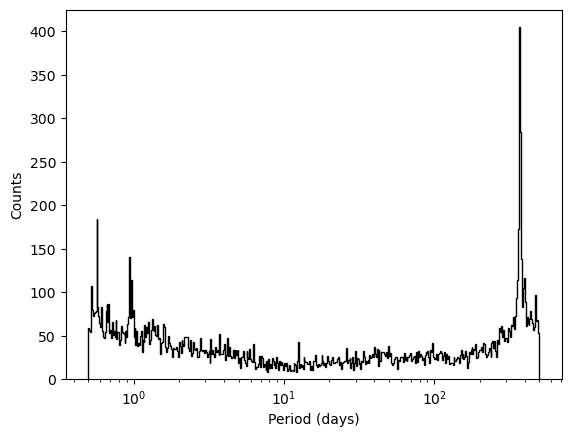

In [64]:
# plot PC fraction as function of orbital period

period_bins = 5 * np.logspace(-1, 2, 500, endpoint=True)
clf_thr = 0.5
pc_fraction = [((ranking_tbl['tce_period'] >= s_per) & (ranking_tbl['tce_period'] < e_per) & (ranking_tbl['score'] >= clf_thr)).sum() / ((ranking_tbl['tce_period'] >= s_per) & (ranking_tbl['tce_period'] < e_per)).sum() for s_per, e_per in zip(period_bins[:-1], period_bins[1:])]

f, ax = plt.subplots()
# ax.hist(x=pc_fraction)  # , bins=mes_bins) # , histtype='step')
# ax.bar(x=mes_bins[:-1], height=pc_fraction, log=True, histtype='step')
ax.step(x=period_bins[:-1], y=pc_fraction, color='k')
ax.set_ylabel('PC Fraction')
ax.set_xlabel('Period (days)')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(bottom=0)

f, ax = plt.subplots()
ax.hist(ranking_tbl['tce_period'], period_bins, histtype='step', color='k')
ax.set_ylabel('Counts')
ax.set_xlabel('Period (days)')
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_ylim(bottom=0)